## 1.Problem statemet

Use relevent machine learning model to predict total sales using features like money spent on Advertising/Marketing individual fields


## 2.Import basic liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## 3.Load Dataset

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
#droping column 
df.drop("Unnamed: 0", axis=1,inplace=True)

In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## 4.Domian Analysis

1. Sales is taget
2. TV,Radio,Newspaper are input variables
3. This data tell us total sales made by the company by investing certain amount of the Tv, Radio ,Newspaper Advertising

# 5.Basic Checks

In [10]:
#shape
df.shape

(200, 4)

In [11]:
#Checking columns
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
#Checking DataTypes
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [14]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
#describe:Getting statical  summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
#head
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
#tail
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


## Insights

1. Average sales made by the company is 14 $M
2. Average amount spent on Tv is more compared 	Radio and Newspaper
3. maximum amount spent on TV Advertising is more compared 	to Radio and Newspaper

In [19]:
#Checking missing values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploratory Data Analysis

1. Univariate Analysis:Univariate analysis is the simplest form of data analysis where only one variable (column/feature) is analyzed at a time.
2. 🔹 Why We Use Univariate Analysis

To Understand Data Distribution:
It helps you understand how the values of a single variable are spread — whether they are concentrated, spread out, or skewed.

 ## To Identify Outliers:
1.It helps in detecting values that are unusually high or low compared to others.

2.To Summarize Data:
    You can calculate basic statistical measures such as:
    Mean, Median, Mode (for numerical data)
    Frequency counts (for categorical data)
    Minimum, Maximum, Standard Deviation, etc.

3.To Choose Right Model or Preprocessing Steps:
  Understanding variable types (continuous, categorical) helps in:
  Choosing appropriate encoding methods (like one-hot encoding for categorical)
   Deciding scaling/normalization for numerical data

To Detect Data Issues:
Missing values, incorrect entries, or inconsistent categories can be spotted.

## When We Use Univariate Analysis

You use Univariate Analysis:

1.At the start of Exploratory Data Analysis (EDA) —
  It’s the first step before bivariate or multivariate analysis.

2.When you want to describe a single feature —
 For example, analyzing "Age" of customers to see average or most common age group.
3.Before Feature Engineering —
 To decide how to handle missing values, outliers, or transformations.
4.For visual insights —
 You use graphs like:

  - Histogram → for numerical data

   - Boxplot → for outlier detection

  - Bar chart / Pie chart → for categorical data

In [20]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- Check distribution of TV
  - drawing a dist plot fo TV :We use dist plot bcz TV have numerical data

<Axes: ylabel='Density'>

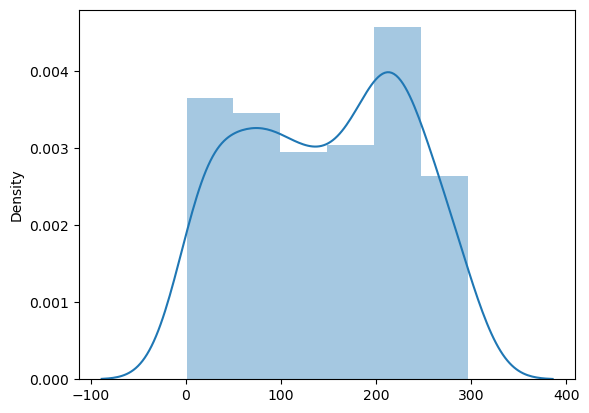

In [24]:
#drawing a dist plot fo TV :We use dist plot bcz TV have numerical data
sns.distplot(x=df.TV)

- Check distribution of Radio
   - drawing a dist plot for Radio  :We use dist plot bcz Radio have numerical data

<Axes: ylabel='Density'>

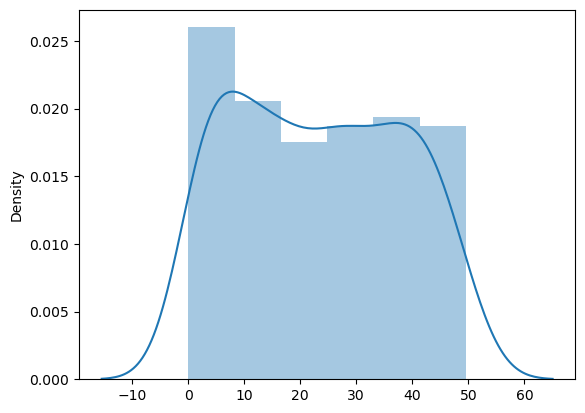

In [25]:
sns.distplot(x=df.Radio)

- Check distribution of Newspaper
   - drawing a dist plot for Newspaper :We use dist plot bcz Newspaper have numerical data

<Axes: ylabel='Density'>

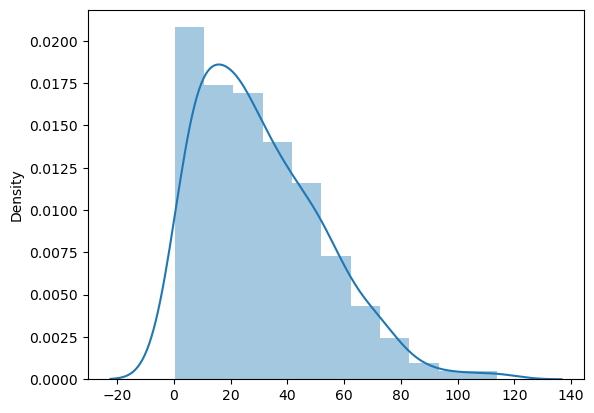

In [26]:
sns.distplot(x=df.Newspaper)

- Check distribution of Sales
   - drawing a dist plot for Sales :We use dist plot bcz Sales have numerical data

<Axes: ylabel='Density'>

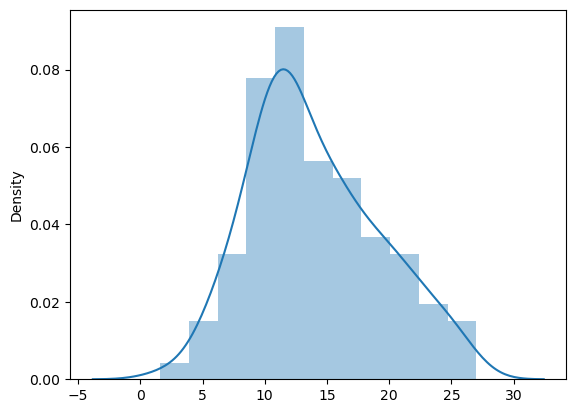

In [27]:
sns.distplot(x=df.Sales)

## Insights
 - Sales is representing Normally Distribution
 - Tv Radio and Newspaper are representing skweness or normal

In [29]:
df.corr

<bound method DataFrame.corr of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

## Bivariate

Bivariate analysis is the study of two variables (columns/features) to understand the relationship between them.
Why We Use Bivariate Analysis

- To Find Relationships Between Variables
- To Check Correlation
- To Compare Two Variables
   You can compare:
    - Two numerical variables
    - One categorical and one numerical variable
    - Two categorical variables
- Numerical – Numerical	Scatter, Line, Heatmap, Joint	Seaborn / Matplotlib
- Categorical – Numerical	Box, Violin, Bar, Strip	Seaborn
- Categorical – Categorical	Count, Heatmap, Stacked Bar	Seaborn / Pandas / Matplotlib

<Axes: xlabel='TV', ylabel='Sales'>

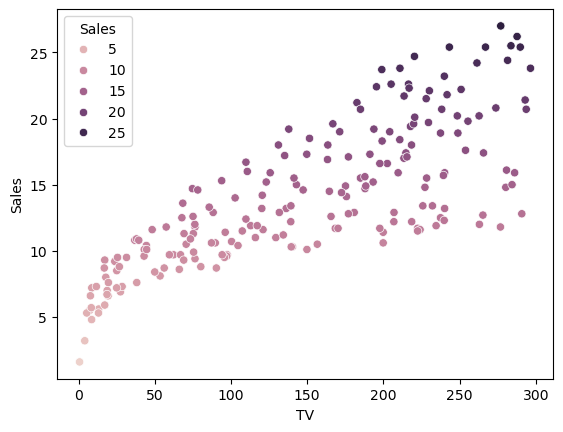

In [31]:
#Analyse how amount spent on TV impact sales
sns.scatterplot(data=df,x='TV',y='Sales',hue='Sales')

## Insights of Above the graph
- as we increase amount of money spent on Tv advertising then sales will be the increasng
- There is high correlation between TV and Sales
- There is Positive relation between TV and sales
- This suggests a linear relationship — making it a good case for Linear Regression modeling.

<Axes: xlabel='Radio', ylabel='Sales'>

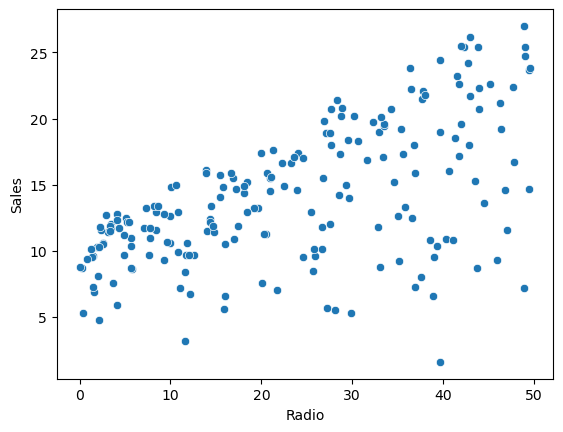

In [32]:
#Analyse how amount spent on Radio impact sales
sns.scatterplot(data=df,x='Radio',y='Sales')

## Insights
- there is no strong corelation between Radio
- It dosent have must impact on sales
- we can see the high investment on Radio and sometime sales was high and sometimes sales was low
- 

<Axes: xlabel='Newspaper', ylabel='Sales'>

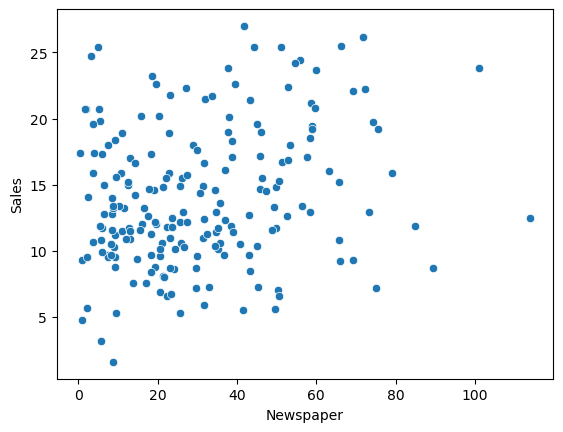

In [33]:
#Analyse how amount spent on NewsaPaper  impact sales
sns.scatterplot(data=df,x='Newspaper',y='Sales')

## Insights
- There is no coorrelation between Newspaper and Sales
  

## Final Insights of all theree variables relationships
- TV is the best filed to invest for advertising

## Multivariate

Multivariate Analysis is a statistical technique used to analyze data that involves more than one independent variable (feature) and one dependent variable (target).
- It helps you understand relationships and patterns among multiple variables at the same time.
- 
**Purpose of Multivariate Analysis**

To study interactions among variables.

To predict outcomes (dependent variable) from several inputs.

To reduce dimensions of large datasets.

To detect patterns, group similarities, or classify data.

**Visualization Tools for Multivariate Analysis**

- Pair Plot (sns.pairplot()) → plots relationships between all numerical variables.

- Heatmap (sns.heatmap()) → shows correlation between variables.

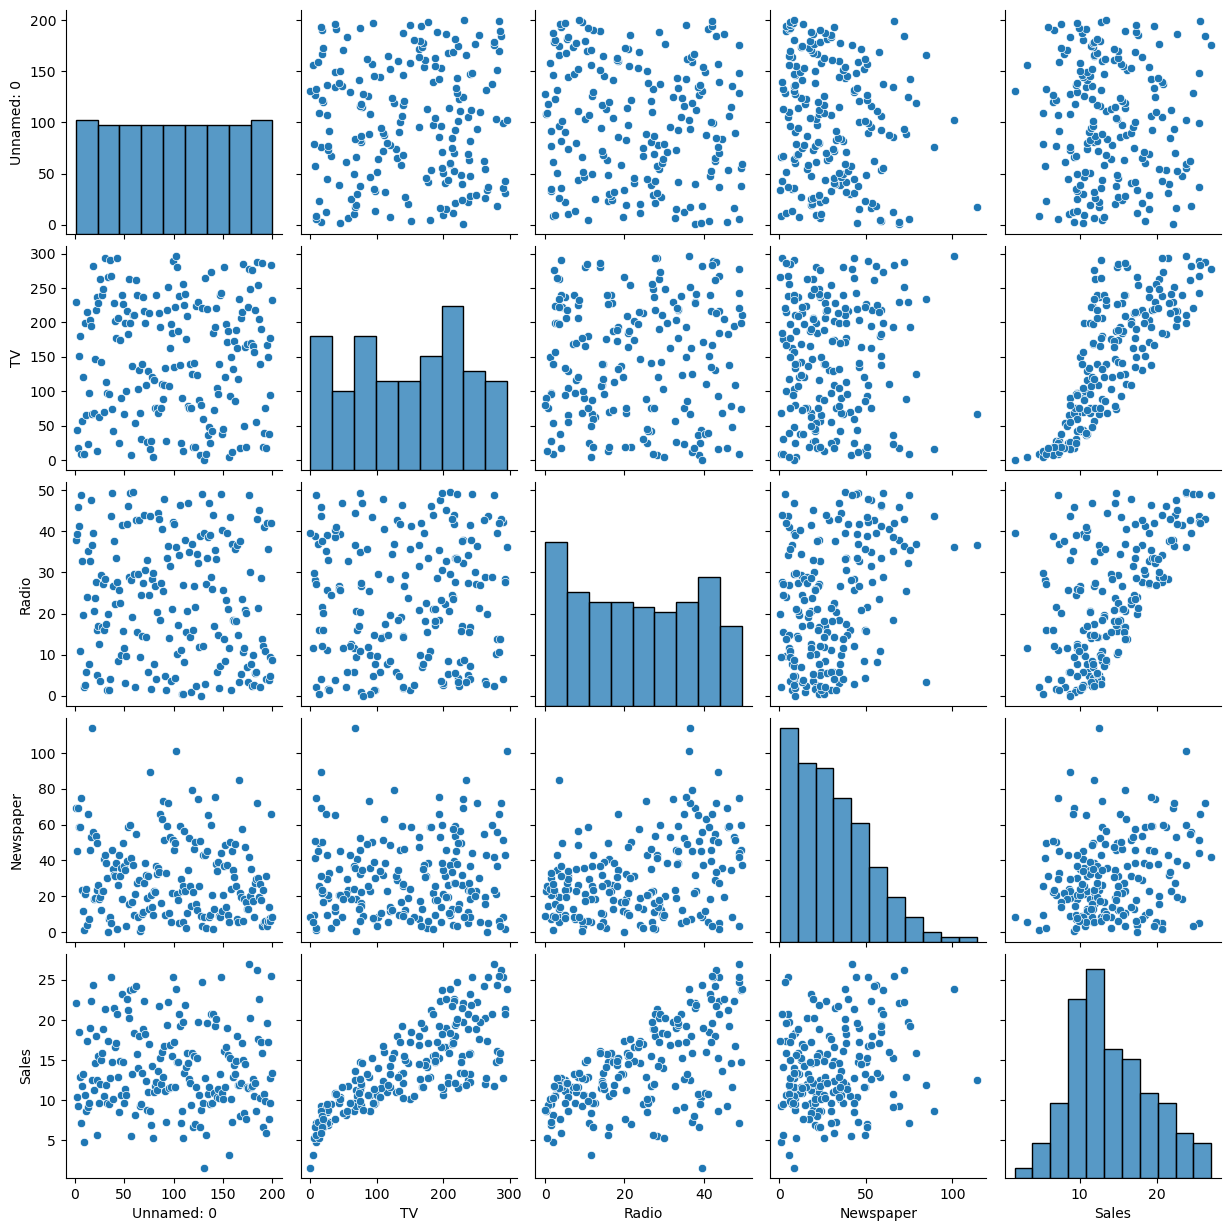

In [5]:
sns.pairplot(data=df)

## Checking Duplicate Values


In [7]:
df.duplicated().sum()

np.int64(0)

## Checking Outliers


<Axes: xlabel='TV'>

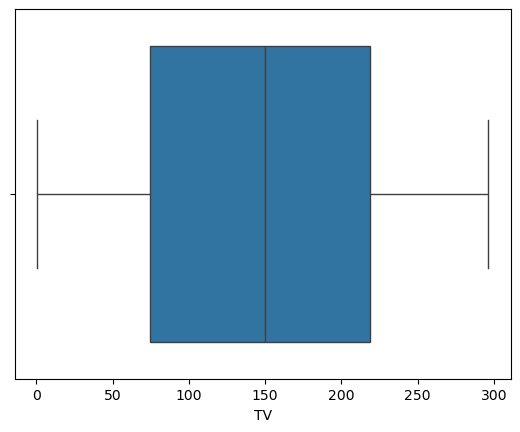

In [9]:
#Outliesr in TV
sns.boxplot(x=df.TV)

<Axes: xlabel='Radio'>

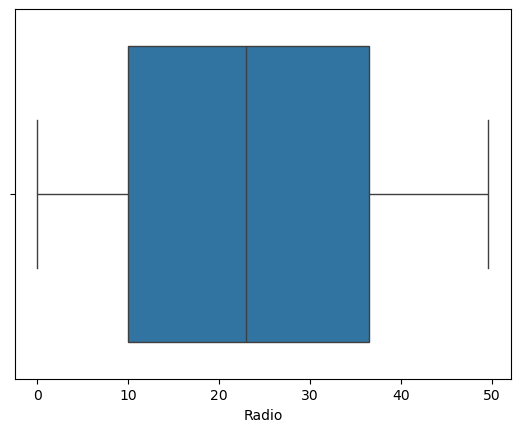

In [10]:
#Outliesr in Radio
sns.boxplot(x=df.Radio)

<Axes: xlabel='Newspaper'>

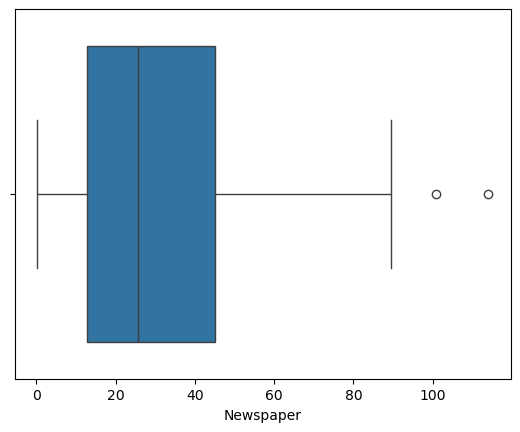

In [11]:
#Outliesr in Newspaper
sns.boxplot(x=df.Newspaper)

<Axes: xlabel='Sales'>

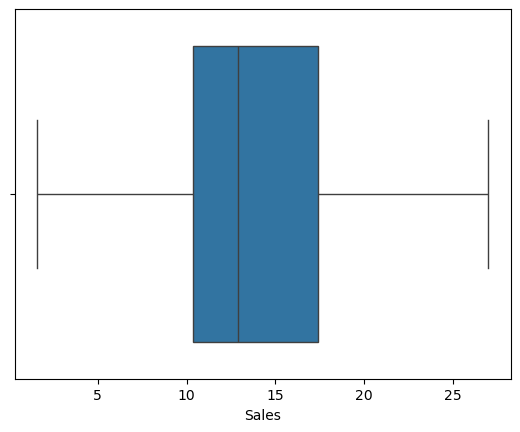

In [12]:
#Outliesr in Sales
sns.boxplot(x=df.Sales)

## Calculating IQR

In [4]:
Q1=df['Newspaper'].quantile(0.25)
Q3=df['Newspaper'].quantile(0.75)
IQR=Q3-Q1

## Define outlier boundaries

In [5]:
lower_bound=Q1 - 1.5 *IQR
upper_bound=Q3 + 1.5 * IQR

## Finding Outlier

In [6]:
## Finding Upper Limit
df.loc[df['Newspaper'] > upper_bound]


,Unnamed: 0,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [14]:
## Finding Lower Limit
df.loc[df['Newspaper']<lower_bound]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [15]:
len(df.loc[df['Newspaper']>upper_bound])/len(df)

0.01

In [ ]:
#The newspapaer outlier less than 5% so we needx to handle newspaper outliers

## How to  handle outliers


<Axes: xlabel='Newspaper', ylabel='Count'>

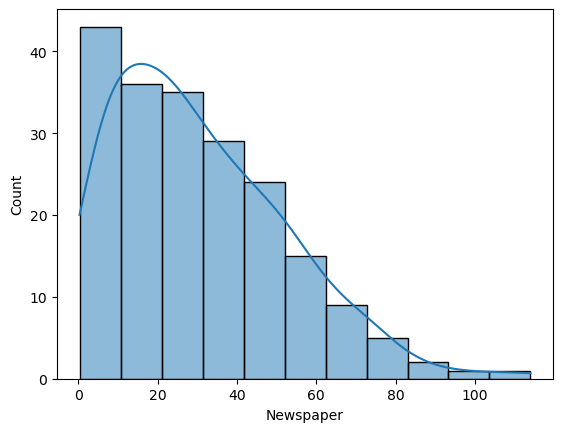

In [18]:
sns.histplot(x=df['Newspaper'],kde=True)

In [22]:
#Since the data is not normally distribution we will replace with median
df.loc[df['Newspaper']>upper_bound,'Newspaper']=df['Newspaper'].median()

<Axes: xlabel='Newspaper'>

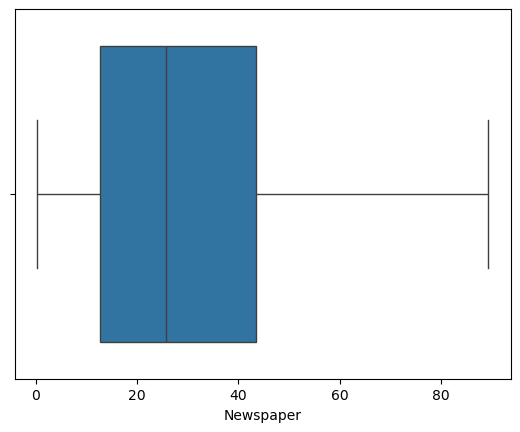

In [23]:
#Check are there any outliers
sns.boxplot(x=df.Newspaper)

## Adjusted R2_score

**Metrics to measure the performance of mode**
 1. R² score / R-squared
    It is used to measure the strength of the model.
    It will compare the regression line with the average line.
      - Disadvantage of R²:
        R² score increases as the number of independent variables increases, even if those variables have very less          qrelationship with the target variable.
     - To overcome the above issue, we use Adjusted R²
2. Adjusted R²
    Adjusted R² measures the performance of the model by ignoring columns which have very less relationship with the     target variable.

     Formula:
    Adjusted\ R² = 1 - (1 - R²) \times \frac{(n - 1)}{(n - p - 1)}

Where:

R² = R² score
n = Number of observations (test data)
p = Number of independent variables

Note:
    Adjusted R² score is always less than R² score.
    If the adjusted R² score is close to R², then we say it’s a good model.


In [ ]:
#Adjusted r2_Score
adjr2=1-(1-